In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
txtFilepath="../../createdatabase/out/genus_872.txt"
catalog_df=pd.read_csv(txtFilepath)
catalog_df.head()

,taxid,kingdom,phylum,class,order,family,genus,species,count_real,count_sim,diff,ftp_basename,organism_name,genetic_code,G+C
0,525146,-1,1224,28221,213115,194924,872,876,0.851789,0.777740,0.074048,GCF_000022125.1_ASM2212v1,Desulfovibrio desulfuricans subsp. desulfurica...,11,0.580722
1,883,-1,1224,28221,213115,194924,872,881,1.619893,1.407806,0.212088,GCF_000021385.1_ASM2138v1,Desulfovibrio vulgaris str. 'Miyazaki F',11,0.671090
2,901,-1,1224,28221,213115,194924,872,901,1.387866,1.183206,0.204661,GCF_900116045.1_DESPIGER,Desulfovibrio piger,11,0.641799
3,526222,-1,1224,28221,213115,194924,872,880,0.594646,0.536652,0.057994,GCF_000023445.1_ASM2344v1,Desulfovibrio salexigens DSM 2638,11,0.470928
4,641491,-1,1224,28221,213115,194924,872,876,1.622397,1.369687,0.252709,GCF_000189295.2_ASM18929v2,Desulfovibrio desulfuricans ND132,11,0.652094


In [23]:
dct_lst=[]

for basename in catalog_df["ftp_basename"]:
    dct={}
    dct["ftp_basename"]=basename
    
    filepath="/home/mitsuki/altorf/evolve/createquery/out/{}.kl".format(basename)
    with open(filepath, 'r') as f:
        for i,line in enumerate(f):
            dct["Frame"+str(i+1)]=float(line.strip())
    dct_lst.append(dct)
    

In [24]:
df=pd.DataFrame(dct_lst)
df.head()

,Frame1,Frame2,Frame3,Frame4,Frame5,Frame6,ftp_basename
0,0.001091,0.307609,0.254356,0.097490,0.261168,0.190585,GCF_000022125.1_ASM2212v1
1,0.007487,0.695592,0.429292,0.267495,0.613210,0.240948,GCF_000021385.1_ASM2138v1
2,0.002300,0.618666,0.395840,0.204978,0.549238,0.241542,GCF_900116045.1_DESPIGER
3,0.019427,0.177749,0.179245,0.100601,0.147649,0.152349,GCF_000023445.1_ASM2344v1
4,0.001254,0.897942,0.495012,0.343439,0.817761,0.209214,GCF_000189295.2_ASM18929v2


In [6]:
for i in range(3):
    print(i,end='')

012

In [25]:
out_df=pd.merge(df, catalog_df, on='ftp_basename', how='left')
out_df.head()

,Frame1,Frame2,Frame3,Frame4,Frame5,Frame6,ftp_basename,taxid,kingdom,phylum,...,order,family,genus,species,count_real,count_sim,diff,organism_name,genetic_code,G+C
0,0.001091,0.307609,0.254356,0.097490,0.261168,0.190585,GCF_000022125.1_ASM2212v1,525146,-1,1224,...,213115,194924,872,876,0.851789,0.777740,0.074048,Desulfovibrio desulfuricans subsp. desulfurica...,11,0.580722
1,0.007487,0.695592,0.429292,0.267495,0.613210,0.240948,GCF_000021385.1_ASM2138v1,883,-1,1224,...,213115,194924,872,881,1.619893,1.407806,0.212088,Desulfovibrio vulgaris str. 'Miyazaki F',11,0.671090
2,0.002300,0.618666,0.395840,0.204978,0.549238,0.241542,GCF_900116045.1_DESPIGER,901,-1,1224,...,213115,194924,872,901,1.387866,1.183206,0.204661,Desulfovibrio piger,11,0.641799
3,0.019427,0.177749,0.179245,0.100601,0.147649,0.152349,GCF_000023445.1_ASM2344v1,526222,-1,1224,...,213115,194924,872,880,0.594646,0.536652,0.057994,Desulfovibrio salexigens DSM 2638,11,0.470928
4,0.001254,0.897942,0.495012,0.343439,0.817761,0.209214,GCF_000189295.2_ASM18929v2,641491,-1,1224,...,213115,194924,872,876,1.622397,1.369687,0.252709,Desulfovibrio desulfuricans ND132,11,0.652094


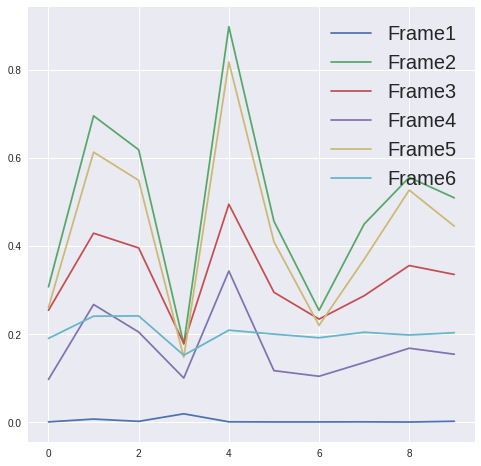

In [30]:
plt.figure(figsize=(8,8))

for i in range(6):
    plt.plot(out_df.index,out_df["Frame"+str(i+1)])
plt.legend(fontsize=20)
plt.show()